In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import scipy.linalg as la
import sympy as sp

# Laboratorio 09 Matrices

---

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

#### Estudiante: Gabriel Rodríguez Suárez

---

## **Punto 1: Modelo de encriptación**


Un proceso para encriptar un mensaje secreto es usar cierta matriz cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc. y espacio=27, se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamaño de la matriz de código, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje.

La persona que debe recibir el mensaje conoce la matriz de código. El o ella arreglan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el número de elementos en una fila conicide con el tamaño de la matriz de código multiplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
```

Mensaje

```
47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588,
```


la primera fila del mensaje es `47,49,-19,257,487`

*¿Cual es el mensaje?*

Definiendo las matrices:

- **$A$** la matriz que multiplica el mensaje.
- **$B$** la matriz del mensaje original.
- **$C$** la matriz de mensaje encriptado.
- **$A^{-1}$** inversa de $A$.

Encriptación:

$$AB = C$$

Decriptado:

$$A^{-1}AB = A^{-1}C$$

$$B = A^{-1}C$$

In [3]:
A = np.array([
    [1,2,-3,4,5],
    [-2,-5,8,-8,-9],
    [1,2,-2,7,9],
    [1,1,0,6,12],
    [2,4,-6,8,11]
], dtype=float)

C = np.array([
    [47,49,-19,257,487],
    [10,-9,63,137,236],
    [79,142,-184,372,536],
    [59,70,-40,332,588]
], dtype=float)

In [4]:
abecedario = {1:'A', 2:'B', 3:'C', 4:'D', 5:'E', 6:'F', 7:'G', 8:'H', 9:'I', 10:'J', 11:'K', 12:'L', 13:'M', 14:'N',
        15: 'O', 16: 'P', 17:'Q', 18:'R', 19:'S', 20:'T', 21:'U', 22:'V', 23:'W', 24:'X', 25:'Y', 26:'Z', 27:'  '}

In [5]:
A_inv = la.inv(A)
B = np.dot(C, A_inv) 
print(B)

[[ 1. 18.  5. 27. 25.]
 [15. 21. 27.  8.  1.]
 [22.  9. 14.  7. 27.]
 [ 6. 21. 14. 27. 27.]]


In [6]:
len(abecedario)
abecedario[20]

'T'

In [7]:
mensaje = ''

B_array1 = np.reshape(B, (1,20))

B_array = B_array1[0]
print(len(B_array))
print(B_array)

for i in range(len(B_array)):
    for j in range(len(abecedario)):
        if round(B_array[i]) == j:
            mensaje += abecedario[j]
print(mensaje)

20
[ 1. 18.  5. 27. 25. 15. 21. 27.  8.  1. 22.  9. 14.  7. 27.  6. 21. 14.
 27. 27.]
AREYOUHAVINGFUN


In [8]:
print('Are you having fun?, dice el mensaje, que en español es: ¿Estás divirtiéndote?')
print('Con tanto trabajo porfe, se vuelve éste parte de la diverisón jajaja.')

Are you having fun?, dice el mensaje, que en español es: ¿Estás divirtiéndote?
Con tanto trabajo porfe, se vuelve éste parte de la diverisón jajaja.


# **Punto 2: Operaciones matricial con regresión lineal.**

Cuando se desea hacer una regresión lineal multivariada, existen diferentes formas de realizar la regresión, una de ellas es encontrar el error cuadrático medio y minimizar el conjunto de parámetros de la regresión emplando algún método de minimización; otra forma es encontrar la expresión analítica en forma matricial, para determinar el conjunto de parámetros de la regresión. En este último caso, la regresión lineal viene dada por la siguiente expresion generalizada:


$$\Theta = (X^T X)^{-1} X^T y$$

donte $\Theta$ es la matriz de parametros asociados a la regresión lineal, $X$ la matriz de características y $y$ los valos esperados, así, si tenemos una conjunto de datos en $N$ dimensiones; la recta, plano o hiperplano puede ser calculado como:

$$Y=\Theta^T X$$


En el caso de dos dimensiones, supongamos que $X$, e $Y$ presentan un comportamiento lineal, y vienen dados por (en este caso el super indice es):


- Sea $\vec{X}=x^{(1)}, x^{(2)}, x^{(3)}, x^{(4)}, ..., x^{(m)}$
- Sea $\vec{Y}=y^{(1)}, y^{(2)}, y^{(3)}, y^{(4)}, ..., y^{(m)}$

Para determinar la ecuación de la recta, hay que conocer los párametros $\theta_0 $, $\theta_1$, que cumplen que :   $y^{(i)} = \theta_1 x^{(i)} + \theta_0$ la anterior expresión puede ser escrita como:

\begin{equation}
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}\\
\end{bmatrix}=
\begin{bmatrix}
\theta_0 & \theta_1 \\
\end{bmatrix}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(m)} \\
\end{bmatrix}
\end{equation}


Para determinar la matriz de theta entonces se puede aplicar la ecuación:

$$\Theta = (X^T X)^{-1} X^T y$$

donde:
\begin{equation}
X=
\begin{bmatrix}
1 & x_1^{(1)} \\
1 & x_1^{(2)} \\
\vdots & \vdots \\
1 & x_1^{(m)}
\end{bmatrix}
\end{equation}

y


\begin{equation}
y=
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots\\
y^{(m)}
\end{bmatrix}
\end{equation}

Su tarea será construir un programa que realice la regresión lineal para los siguientes puntos:
```python
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise
```



Generalice para el siguiente problema bidimensional:


```python
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100)

N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
#scatter = ax.scatter(x1, x2, y,"-")
```

## Caso unidimensional:

### Determinando la matriz $\Theta$:

In [9]:
def regresion_lineal(x_values, y):
    y_values = np.reshape(y, (len(y),1))
    n = len(x_values)
    if len(y) == len(x_values):
        ones = np.ones(n, dtype=float)
        X_T = np.array([ones, x_values], dtype=float)
        X = np.transpose(X_T)

        U = np.linalg.matmul(X_T,X) 
        Theta = la.inv(U) @ X_T @ y_values
        return Theta, X_T
    else:
        return 'La dimensión de los vectores es distinta.'

In [10]:
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise

print(f'x = {x1}')
print(f'Dimensión de x = {len(x1)}')

print(f'y = {y}')
print(f'Dimensión de y = {len(y)}')

x = [ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]
Dimensión de x = 10
y = [-7.03488117e-03  1.36235648e+00  2.25116052e+00  3.32986104e+00
  4.13002836e+00  5.71627775e+00  6.82036188e+00  6.96295643e+00
  7.42058807e+00  9.96403944e+00]
Dimensión de y = 10


In [11]:
theta, X_T = regresion_lineal(x1,y)
theta

array([[0.21967711],
       [0.91507648]])

### Calculando $Y$ con la matriz $\Theta$:

10 10


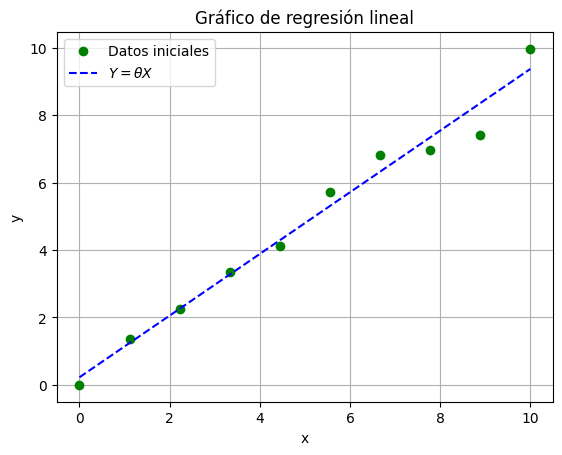

In [12]:
theta_T = np.array([theta[0,0], theta[1,0]])

Y_T = theta_T @ X_T

print(len(X_T[1]), len(Y_T))

plt.plot(x1, y, 'go', label='Datos iniciales')
plt.plot(X_T[1], Y_T, 'b--', label=r'$Y = \theta X$')
plt.title('Gráfico de regresión lineal')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Caso bidimensional:

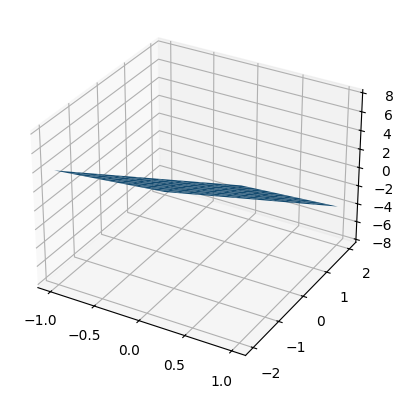

In [13]:
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100)

N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
#scatter = ax.scatter(x1, x2, y,"-")

In [14]:
u, v, x = np.array([1,3,2]), np.array([3,4,5]), np.array([6,1,9])

np.column_stack((u,v,x))

array([[1, 3, 6],
       [3, 4, 1],
       [2, 5, 9]])

In [15]:
def multi_linealreg(x_a, x_b, y):
    y_values = np.reshape(y, (len(y),1))
    n = len(x_a)
    if len(y) == n:
        ones = np.ones(n, dtype=float)
        X = np.column_stack((ones, x_a, x_b))
        #print(X)
        X_T = np.transpose(X)
        #print(X_T)
        #var = np.var(X, axis=2)
        #print(var)

        U = np.dot(X_T, X)
        #print(np.linalg.det(U)) 
        #Theta = la.inv(U) @ X_T @ y_values
        return U
    else:
        return 'La dimensión de los vectores es distinta.'

In [16]:
multi_linealreg(x1, x2, y)

array([[10.        ,  0.        ,  0.        ],
       [ 0.        ,  4.07407407,  8.14814815],
       [ 0.        ,  8.14814815, 16.2962963 ]])

In [17]:
def multi_linealreg(x_a, x_b, y):
    y_values = np.reshape(y, (len(y), 1))  # Convertimos y a columna
    n = len(x_a)
    
    if len(y) == n and len(x_b) == n:  # Verificamos dimensiones correctas
        ones = np.ones(n, dtype=float)  # Agregamos columna de unos
        X = np.column_stack((ones, x_a, x_b))  # Matriz de diseño (X)
        
        # Cálculo de (X^T * X)
        X_T = X.T
        U = np.dot(X_T, X)
        
        # Cálculo de (X^T * y)
        V = np.dot(X_T, y_values)
        
        # Usamos pseudo-inversa en lugar de inversa
        Theta = np.linalg.pinv(U) @ V  
        
        return Theta, X  # Devuelve los coeficientes

    else:
        return 'La dimensión de los vectores es distinta.'

In [18]:
theta, X = multi_linealreg(x1, x2, y)
X_T = np.array(X.T)
np.shape(X)

(10, 3)

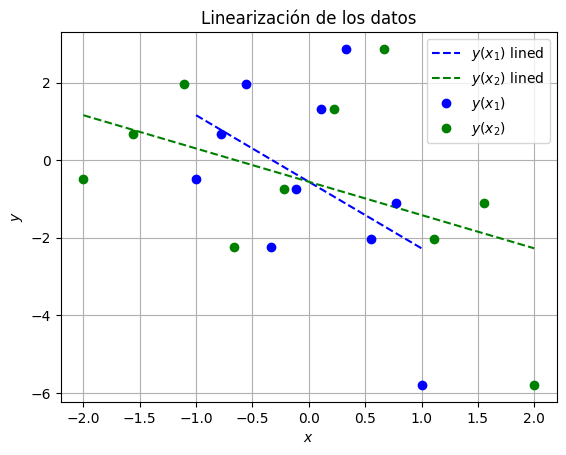

In [19]:
Y = np.dot(theta.T,X_T).T
len(X_T[0])

plt.plot(X_T[1], Y, 'b--', label=r'$y(x_{1})$ lined')
plt.plot(X_T[2], Y, 'g--', label=r'$y(x_{2})$ lined')
plt.plot(x1, y, 'bo', label=r'$y(x_{1})$')
plt.plot(x2, y, 'go', label=r'$y(x_{2})$')
plt.title('Linearización de los datos')
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid()

# **Punto 3: Diagonalización**.

Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

a) Diagonalize $A$.

b) Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$

## a) Diagonalizar $A$:

In [20]:
A = np.array([[2,-1,1],[0,3,-1],[2,1,3]], dtype=float)

autovalores = np.linalg.eig(A)[0]
autovectores = np.linalg.eig(A)[1]
print(autovalores)

[4.+0.00000000e+00j 2.+1.68652966e-08j 2.-1.68652966e-08j]


In [21]:
D = np.real(np.diag(autovalores))
U = autovectores.T

print('Matriz D (diagnoal con autovalores):')
print(D)

print('Matriz U (columnas con los autovectores):')
print(U)

U_inv = np.real(la.inv(U))

print('Matriz U inversa:')
print(U_inv)

Matriz D (diagnoal con autovalores):
[[4. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]]
Matriz U (columnas con los autovectores):
[[-0.57735027+0.00000000e+00j  0.57735027+0.00000000e+00j
  -0.57735027+0.00000000e+00j]
 [-0.57735027+9.73718355e-09j  0.57735027+0.00000000e+00j
   0.57735027-9.73718355e-09j]
 [-0.57735027-9.73718355e-09j  0.57735027-0.00000000e+00j
   0.57735027+9.73718355e-09j]]
Matriz U inversa:
[[-8.66025404e-01  4.20815161e-01  4.45210243e-01]
 [ 3.67847345e-16  8.53827863e-01  8.78222945e-01]
 [-8.66025404e-01  4.33012702e-01  4.33012702e-01]]


In [22]:
t = np.linspace(0,2,50)

r0 = np.array([1,1,2])

fD = np.exp(D*t[25]) @ r0
sol = np.real(U@fD@U_inv)
sol

array([ 51.54522294, -42.12234408, -43.57432219])

## b) Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

In [23]:
def solucion(A):
    autovalores = np.linalg.eig(A)[0]
    autovectores = np.linalg.eig(A)[1]

    D = np.diag(autovalores)
    U = autovectores.T
    U_inv = np.linalg.inv(U)

    t = np.linspace(0,2,50)
    r_0 = np.array([1,1,2])

    sol = np.zeros((len(t), 3))

    for i in range(len(t)):
        fD = np.exp(D*t[i]) @ r_0
        #print(fD)
        sol[i] = np.real(U@fD@U_inv)
    return sol, r_0

## c) Gráfica de las soluciones de las EDOs:

In [24]:
r = solucion(A)

plt.plot(t, r[:,0], 'b-', label=r'$x(t)$')
plt.plot(t, r[:,1], 'r', label=r'$y(t)$')
plt.plot(t, r[:,2], 'g', label=r'$z(t)$')
plt.title('Solución de las EDO')
plt.legend()
plt.grid()
plt.show()

TypeError: tuple indices must be integers or slices, not tuple

## d) Comparación con la solución analítica:

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$

In [ ]:
def sol_analitica(t, x_0, y_0, z_0):
    e2t = np.exp(2*t)
    x = (x_0*(e2t*(1+e2t-2*t)) + y_0*(-2*t*e2t) + z_0*(e2t*(-1+e2t)))/2
    y = (x_0*(-e2t*(-1+e2t - 2*t)) + y_0*(2*e2t*(t+1)) + z_0*(-e2t*(-1+e2t)))/2
    z = (x_0*(e2t*(-1+e2t+2*t)) + y_0*(2*t*e2t) + z_0*(e2t*(1+e2t)))/2
    return x, y, z

TypeError: tuple indices must be integers or slices, not tuple

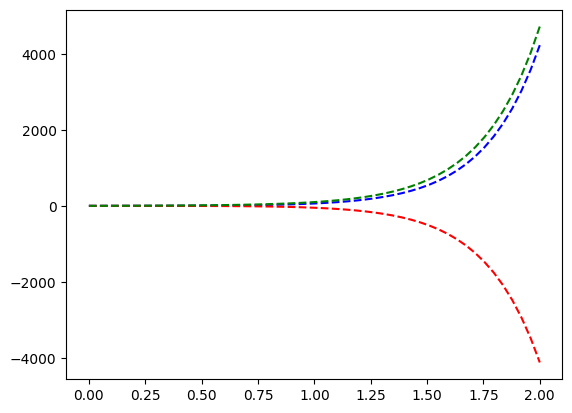

In [ ]:
t = np.linspace(0,2,50)
pos = np.array([1,1,2])

x, y, z = sol_analitica(t,pos[0],pos[1],pos[2])

plt.plot(t, x, 'b--', label=r'x(t) analítica')
plt.plot(t, y, 'r--', label=r'y(t) analítica')
plt.plot(t, z, 'g--', label=r'z(t) analítica')
plt.plot(t, r[:,0], 'b-', label=r'$x(t)$')
plt.plot(t, r[:,1], 'r', label=r'$y(t)$')
plt.plot(t, r[:,2], 'g', label=r'$z(t)$')
plt.title('Soluciones analíticas vs soluciones numéricas')
plt.legend()
plt.grid()
plt.show()

# **Punto 4: Modelo de población de una especie de pajaros**
Se estudiará un modelo de crecimiento de la poblacion para una especie de pájaros. En esta población se supone que el número de pajaros hembras es igual al número de machos.  Sea :
- $p_{j,n-1}$ la poblacion juvenil (inmadura) de hembras en el año (n-1)
- $p_{a,n-1}$ el numero de hembras adultas en el mismo año.

Algunos de los pájaros jóvenes morirán  durante el año. Se suponen que cierta proporción de pájaros $\alpha$ de los pájaros jovenes sobrevivirán para llegar a adultos en la primavera del año $n$. Cada hembra que sobrevive prdocuce huevos en la primavera, los incupan y producen, en promedio, $k$ pájaros hembras jóvenes en al siguiente primavera. Los adultos también mueren y la proporcion de adultos que sobrevive de una primavera a la siguiente es $\beta$.

Un modelo para el crecimiento poblacional de pajaros
\begin{equation}
p_{j,n} = kp_{a, n-1}
\end{equation}


\begin{equation}
p_{a,n} =\alpha p_{j,n-1} + \beta p_{a, n-1}
\end{equation}

Que puede ser escrita como ${\bf p_n}=A{\bf p_{n-1}}$, Siendo A la matrix definida en las ecuaciones anteriores, y ${\bf p_n}$ un vector. Para la evolución temporal se cumple que:

- ${\bf p_1}=A{\bf p_{0}}$, ${\bf p_2}=A{\bf p_{1}}= A(A{\bf p_0})=A^2{\bf p_{0}}$ $...$ y asi sucesivamente. Entonces:

\begin{equation}
{\bf p_n} = A^n {\bf p_{0}}
\end{equation}


Supongamos que tenemos 10 hembras  (y 10 machos) adultos y no hay jovenes, la supongmaos que la matriz A viene dada por:

\begin{bmatrix}
0 & 2 \\
0.3 & 0.5
\end{bmatrix}

para la primera poblacion $p_{j,1}=20$, $p_{a,1}=5$, el total de hembras es 25 y la razón jovenes adultas es de 4 a 1. Muestre que la razon $p_{j,n}/p_{a,n}$ converge $1.88$,(como no se puede tener un número racional de pájaros,. aproxime siempre el resultados al menor entero).

- Para la  solución general del modelo del problema de valores y vetores propios
se tiene que:
\begin{equation}
p_n=\lambda_1^n\left [ a_1 \vec{v}_1 +\left( \frac{\lambda_2}{\lambda_1} \right)^n \right]a_2 \vec{v}_2
\end{equation}

Asumiendo que $\lambda_2/ \lambda_1 < 1$, entonces $(\lambda_2/ \lambda_1)^n << 1$ cuando n crece.  Entonces para n grande se cumple que:

donde $p_n=a_1\lambda_1^n\vec{v}_1$


donde:

${\bf p_0} = a_1 \vec{v}_1 + a_2 \vec{v}_2$, con $v_1$ y $v_2$ vectores propios de A


Según la matriz A:

$k = 2$ Pájaros hermbras jóvenes que sobreviven a la siguiente primavera.

$\alpha = 0.3$ Proporción de pájaros que sobreviven. 

$\beta = 0.5$ Proporción de pájaros que mueren (adultos).

Para la población $p_{0}$:

$p_{a,0} = 10$
$p_{j,0} = 0$

Para la población $p_{1}$:

$p_{a,0} = 5$
$p_{j,0} = 20$

## Solución matricial:

In [104]:
A = np.array([
    [0,2],
    [0.3, 0.5]
])

p0 = np.array([0, 10])

n = 9

An = np.linalg.matrix_power(A,n)

pn = np.dot(An,p0)

print(A[:,0])

[0.  0.3]


In [105]:
def pajaros(A,p0,n):
    '''
    Esta función calcula el número de pájaros adultos y jóvenes (hembras) de una
    población de estos.

    Entradas:
    A: Matriz de constantes k, a y b (cuadrada 2x2).
    p0: Población inicial (vector de dos entradas).
    n: Número de años que se desea conocer la población (type=float).

    Salida:
    Retorna en vector los valores de la población para el n-ésimo año.
    También dos array de hechos de las columnas de la matriz vector que contiene los
    datos de la población, siendo vector[0]: jovenes y vector[1]: adultos.
    '''
    vector = np.zeros((n,2))
    for i in range(n):
        Ai = np.linalg.matrix_power(A,i)
        pn = np.dot(Ai,p0)
        vector[i] = pn

    jovenes = vector[:,0]   
    adultos = vector[:,1]
    years = np.arange(0,n)
    return vector, jovenes, adultos, years

In [100]:
n = 20
vector, jovenes, adultos, years = pajaros(A,p0,n)

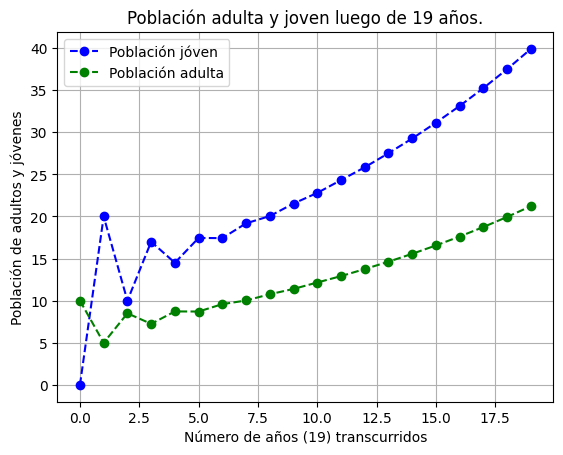

In [ ]:
plt.plot(years, jovenes, 'bo--', label='Población jóven')
plt.plot(years, adultos, 'go--', label='Población adulta')
plt.title(f'Población adulta y joven luego de {n-1} años.')
plt.legend()
plt.grid()
plt.xlabel(f'Número de años ({n-1}) transcurridos')
plt.ylabel(f'Población de adultos y jóvenes')
plt.show()

## Por vectores propios:

\begin{equation}
p_n=\lambda_1^n\left [ a_1 \vec{v}_1 +\left( \frac{\lambda_2}{\lambda_1} \right)^n \right]a_2 \vec{v}_2
\end{equation}

In [124]:
A = np.array([
    [0,2],
    [0.3, 0.5]
])

p0 = np.array([0,10])

prop_values, prop_vectors = np.linalg.eig(A)

l1 = prop_values[0]
l2 = prop_values[1]

v1 = prop_vectors[0]
v2 = prop_vectors[1]

#Matriz de vectores propios de la matriz A:

P = np.column_stack((v1,v2))

P_inv = la.inv(P)

a_vector = np.dot(P_inv,p0)

i = 11
pi = (l1**i)*(a_vector[0]*v1) #+ (l2/l1)**n)*a_vector[1]*v2
pi

array([-0.00692916, -0.00635596])

In [126]:
def pajaros_eig(A,p0,n):
    prop_values, prop_vectors = np.linalg.eig(A)
    v1 = prop_vectors[0]
    v2 = prop_vectors[1]

    l1 = prop_values[0]
    l2 = prop_values[1]
    P = np.column_stack((v1,v2))

    P_inv = la.inv(P)

    a_vector = np.dot(P_inv,p0)

    pn = np.zeros((n,2))

    for i in range(n):
        pi = (l1**i)*(a_vector[0]*v1)# + (l2/l1)**n)*a_vector[1]*v2
        pn[i] = pi
    
    years = np.arange(0,n)
    return pn, years

In [127]:
n = 20
pn ,years = pajaros_eig(A,p0,n)
pn

array([[ 3.77667863e+00,  3.46426221e+00],
       [-2.12982403e+00, -1.95363960e+00],
       [ 1.20109516e+00,  1.10173753e+00],
       [-6.77346841e-01, -6.21314995e-01],
       [ 3.81983675e-01,  3.50385018e-01],
       [-2.15416267e-01, -1.97596488e-01],
       [ 1.21482071e-01,  1.11432767e-01],
       [-6.85087245e-02, -6.28415093e-02],
       [ 3.86348806e-02,  3.54389055e-02],
       [-2.17877944e-02, -1.99854529e-02],
       [ 1.22870312e-02,  1.12706169e-02],
       [-6.92916103e-03, -6.35596328e-03],
       [ 3.90763821e-03,  3.58438848e-03],
       [-2.20367751e-03, -2.02138373e-03],
       [ 1.24274417e-03,  1.13994122e-03],
       [-7.00834425e-04, -6.42859627e-04],
       [ 3.95229287e-04,  3.62534920e-04],
       [-2.22886011e-04, -2.04448316e-04],
       [ 1.25694567e-04,  1.15296794e-04],
       [-7.08843234e-05, -6.50205927e-05]])

# **Punto 5: Sistemas de ecuaciones**
Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, $i_{12}$, $i_{23}$ y asi sucesivamente.

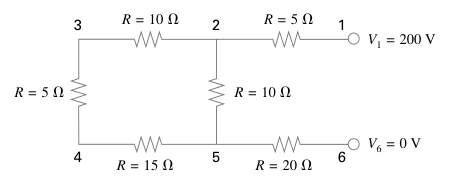

In [11]:
R12 = 5.0
R23 = 10.0
R25 = 10.0
R34 = 5.0
R45 = 15.0
R56 = 20.0
E = 200

A = np.array([
    [1,-1,-1],
    [(R12+R56),0,R25],
    [0,-(R23+R34+R45),R25]
])

b = np.array([0,E,0])

I = np.linalg.solve(A,b)
print(I)

[6.15384615 1.53846154 4.61538462]


In [14]:
I1, I2, I3 = I[0], I[1], I[2]
print('Las corrientes en el circuito son:')
print(f'I1 que pasa por R12 Y R56: I1 = {I1}')
print(f'I2 que pasa por R23, R34 Y R45: I2 = {I2}')
print(f'I3 que pasa por R25: I3 = {I3}')

Las corrientes en el circuito son:
I1 que pasa por R12 Y R56: I1 = 6.153846153846155
I2 que pasa por R23, R34 Y R45: I2 = 1.538461538461538
I3 que pasa por R25: I3 = 4.615384615384615
